## Uppgift 0 - Iris flower dataset

## A

In [28]:
from sklearn.datasets import load_iris

# Ladda Iris-datasetet
iris = load_iris()

# Visa nycklarna i datasetet
print("Nycklar i datasetet:", iris.keys())

# Visa värdena för varje nyckel
for key in iris.keys():
    print(f"\n{key}:")
    print(iris[key])

Nycklar i datasetet: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3. 

## B

In [29]:
import pandas as pd

# Skapa en DataFrame från datan
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Lägg till 'species' som en kolumn i DataFrame
df['species'] = iris.target

# Visa de första raderna i DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## C

Gör en grundläggande EDA (Exploratory Data Analysis) för att förstå datasetet bättre.

In [30]:
# Visa grundläggande statistik för datasetet
print(df.describe())

# Visa antalet observationer per klass
print("\nAntal observationer per klass:")
print(df['species'].value_counts())

# Visa datatyperna för varje kolumn
print("\nDatatyper:")
print(df.dtypes)

# Kolla efter saknade värden
print("\nSaknade värden:")
print(df.isnull().sum())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Antal observationer per klass:
species
0    50
1    50
2    50
Name: co

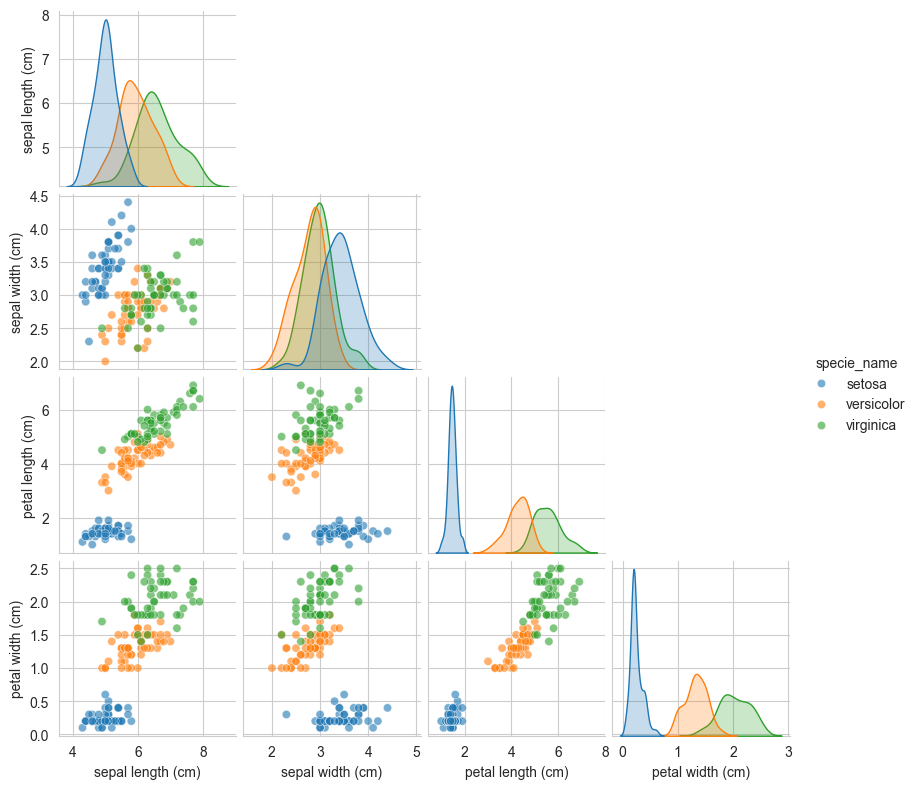

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Skapa en mapping för artnamnen
species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['specie_name'] = df['species'].map(species_names)

# Skapa pairplot med färger baserat på 'specie_name'
sns.set_style("whitegrid")
g = sns.pairplot(df, 
                 vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
                 hue='specie_name',  # Lägg till färger baserat på 'specie_name'
                 diag_kind="kde",
                 plot_kws={'alpha': 0.6},
                 height=2)

# Ta bort överflödiga plots
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

plt.show()

## D

# Korrelationsheatmap för Iris-datasetet

En korrelationsheatmap är en visuell representation av hur olika variabler i ett dataset korrelerar med varandra. Varje cell i heatmappen visar korrelationsvärdet mellan två variabler, och färgen indikerar styrkan och riktningen av korrelationen.

---

## Hur tolkar man heatmappen?

### 1. **Axlar**
   - **X-axeln och Y-axeln**: Visar variablerna i datasetet (t.ex. `sepal length`, `sepal width`, `petal length`, `petal width`).
   - **Varje cell**: Representerar korrelationen mellan två variabler.

### 2. **Färgskala**
   - **Blå eller kallare färger**: Negativ korrelation (när en variabel ökar, minskar den andra).
   - **Röd eller varmare färger**: Positiv korrelation (när en variabel ökar, ökar den andra också).
   - **Vit eller neutral färg**: Ingen korrelation (variablerna är oberoende av varandra).

### 3. **Siffror i cellerna**
   - **1.0**: Perfekt positiv korrelation.
   - **-1.0**: Perfekt negativ korrelation.
   - **0.0**: Ingen korrelation.

---

## Exempel från Iris-datasetet

### 1. **`sepal length` och `petal length`**
   - Korrelationsvärdet är högt (t.ex. 0.87), vilket betyder att de har en stark positiv korrelation. När `sepal length` ökar, ökar också `petal length`.

### 2. **`sepal width` och `petal length`**
   - Korrelationsvärdet är lågt eller negativt (t.ex. -0.42), vilket betyder att de har en svag negativ korrelation. När `sepal width` ökar, minskar `petal length`.

### 3. **Diagonalen**
   - Varje variabel korrelerar perfekt med sig själv, så diagonalen visar alltid 1.0.

---

## Varför är detta användbart?

- **Identifiera relationer**: Du kan snabbt se vilka variabler som är starkt relaterade till varandra.
- **Undvika multikollinearitet**: Om två variabler är starkt korrelerade kan det vara onödigt att inkludera båda i en modell.
- **Förstå datasetet**: Det ger dig en översikt över hur variablerna påverkar varandra.

---

## Sammanfattning

Heatmappen är ett kraftfullt verktyg för att förstå relationerna mellan variabler i ditt dataset. Genom att titta på färgerna och siffrorna kan du snabbt identifiera starka och svaga korrelationer.

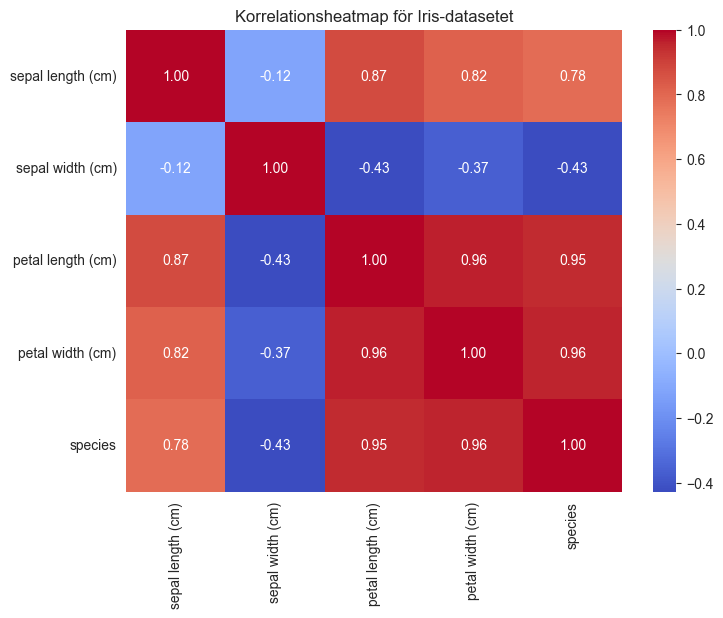

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Beräkna korrelationsmatrisen med den numeriska 'species'-kolumnen
corr = df.corr(numeric_only=True)
""" numeric_only=True: Säkerställer att endast numeriska kolumner 
    inkluderas i korrelationsberäkningen.
"""
# Skapa en heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korrelationsheatmap för Iris-datasetet')
plt.show()

## E


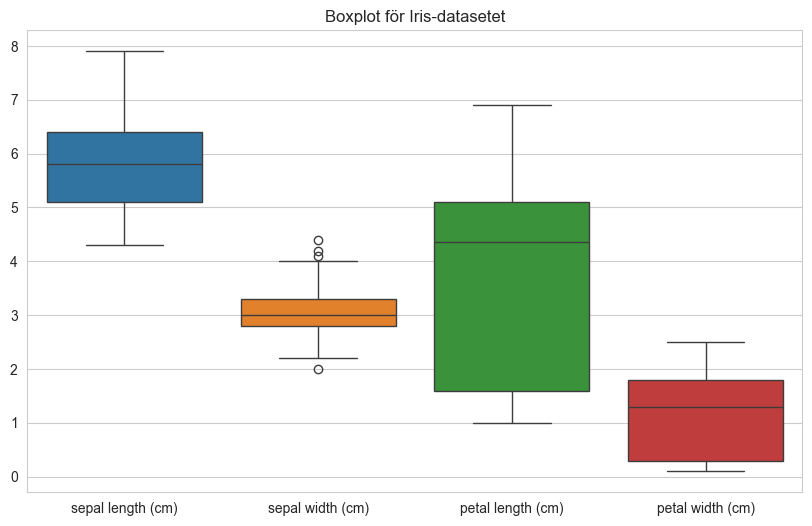

In [38]:

# Skapa boxplot för varje variabel
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
plt.title('Boxplot för Iris-datasetet')
plt.show()

# Boxplot och Outliers

En boxplot är ett kraftfullt verktyg för att visualisera fördelningen av data och identifiera outliers. Här är en förklaring av dess komponenter och hur man identifierar outliers.

---

## Komponenter i en boxplot

1. **Boxen**:
   - Representerar interkvartilavståndet (IQR), dvs. mellan 25:e och 75:e percentilen.
   - **Linjen i boxen**: Medianen (50:e percentilen).

2. **Whiskers**:
   - Visar intervallet för datapunkter som inte anses vara outliers.
   - Whiskers sträcker sig vanligtvis till Q₁ - 1.5 × IQR och Q₃ + 1.5 × IQR.

3. **Outliers**:
   - Punkter utanför whiskers, markerade som enskilda punkter.

---

## Hur identifierar man outliers?

Outliers är datapunkter som ligger utanför följande gränser:


där:
- **Q₁** = 25:e percentilen
- **Q₃** = 75:e percentilen
- **IQR** = Q₃ - Q₁ (interkvartilavståndet)

---

## Exempel från Iris-datasetet

När du skapar en boxplot för Iris-datasetet kan du snabbt identifiera outliers för varje variabel:
- **Outliers**: Markeras som enskilda punkter utanför whiskers.
- **Whiskers**: Visar det normala intervallet för datapunkter.

---

## Varför är detta användbart?

- **Identifiera avvikande värden**: Outliers kan indikera fel i datan eller särskilda fall som behöver undersökas närmare.
- **Förstå datans spridning**: Boxplot ger en översikt över hur datan är fördelad.

## F